In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath_1 = 'winequality-red.csv'
filepath_2 = 'winequality-white.csv'
datanames = ['RedWineQuality', 'WhiteWineQuality', 'WineQuality']

In [3]:
df_1 = pd.read_csv(filepath_1, sep=';')
df_2 = pd.read_csv(filepath_2, sep=';')
df = pd.concat([df_1, df_2])
dfs = [df_1, df_2, df]
len(df_1), len(df_2), len(df)

(1599, 4898, 6497)

In [4]:
info_filepath = datanames[0]+'.info'
with open(info_filepath, 'w') as f:
    for col in dfs[0].columns[:-1]:
        if len(dfs[0][col].unique()) <= 10:
            print(col, dfs[0][col].unique())
            f.write(col + ' discrete\n')
        else:
            f.write(col + ' continuous\n')
    f.write(dfs[0].columns[-1] + ' continuous\n')  # consider target value as continuous variable
    f.write('LABEL_POS -1')

In [ ]:
dfs[0].to_csv(datanames[0]+'.data', index=False, header=False)

# Data Analysis

In [5]:
dfs[0].iloc[:, -1].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

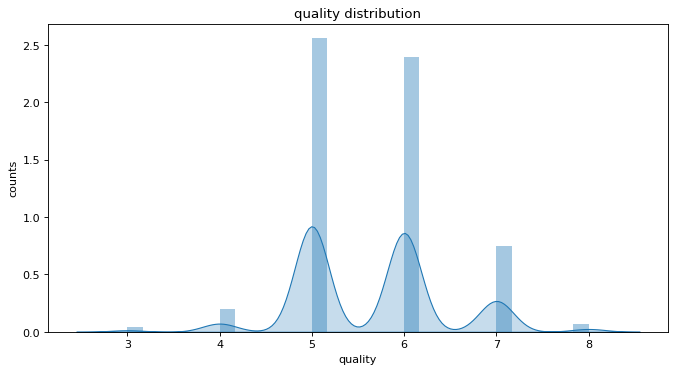

In [6]:
# y label distribution
plt.figure(num = None, figsize = (10,5), dpi = 80, facecolor = 'w', edgecolor = 'k')
sns.distplot(dfs[0].iloc[:, -1], hist=True, kde_kws={"shade": True})
plt.ylabel('counts')
plt.title(f'{dfs[0].columns[-1]} distribution')
plt.savefig('figs/'+datanames[0]+'_label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

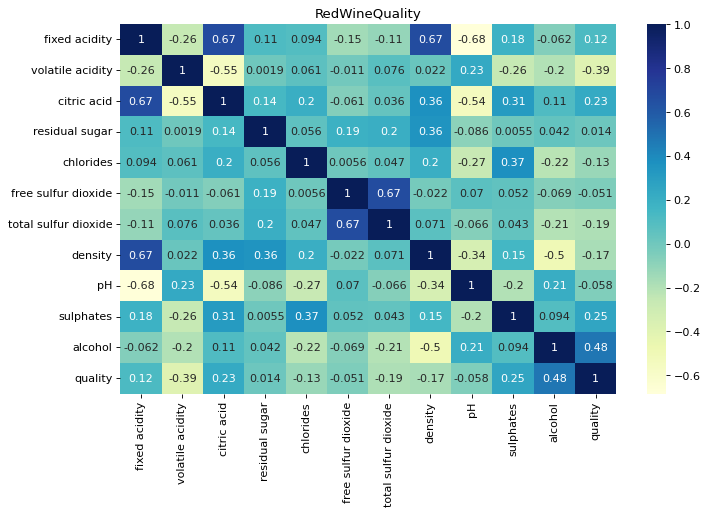

In [7]:
# corr heatmap
plt.figure(num = None, figsize = (10,6), dpi = 80, facecolor = 'w', edgecolor = 'k')
heat_corr=dfs[0].corr()
sns.heatmap(heat_corr, annot=True, cmap='YlGnBu')
plt.title(f'{datanames[0]}')
plt.savefig('figs/'+datanames[0]+'_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

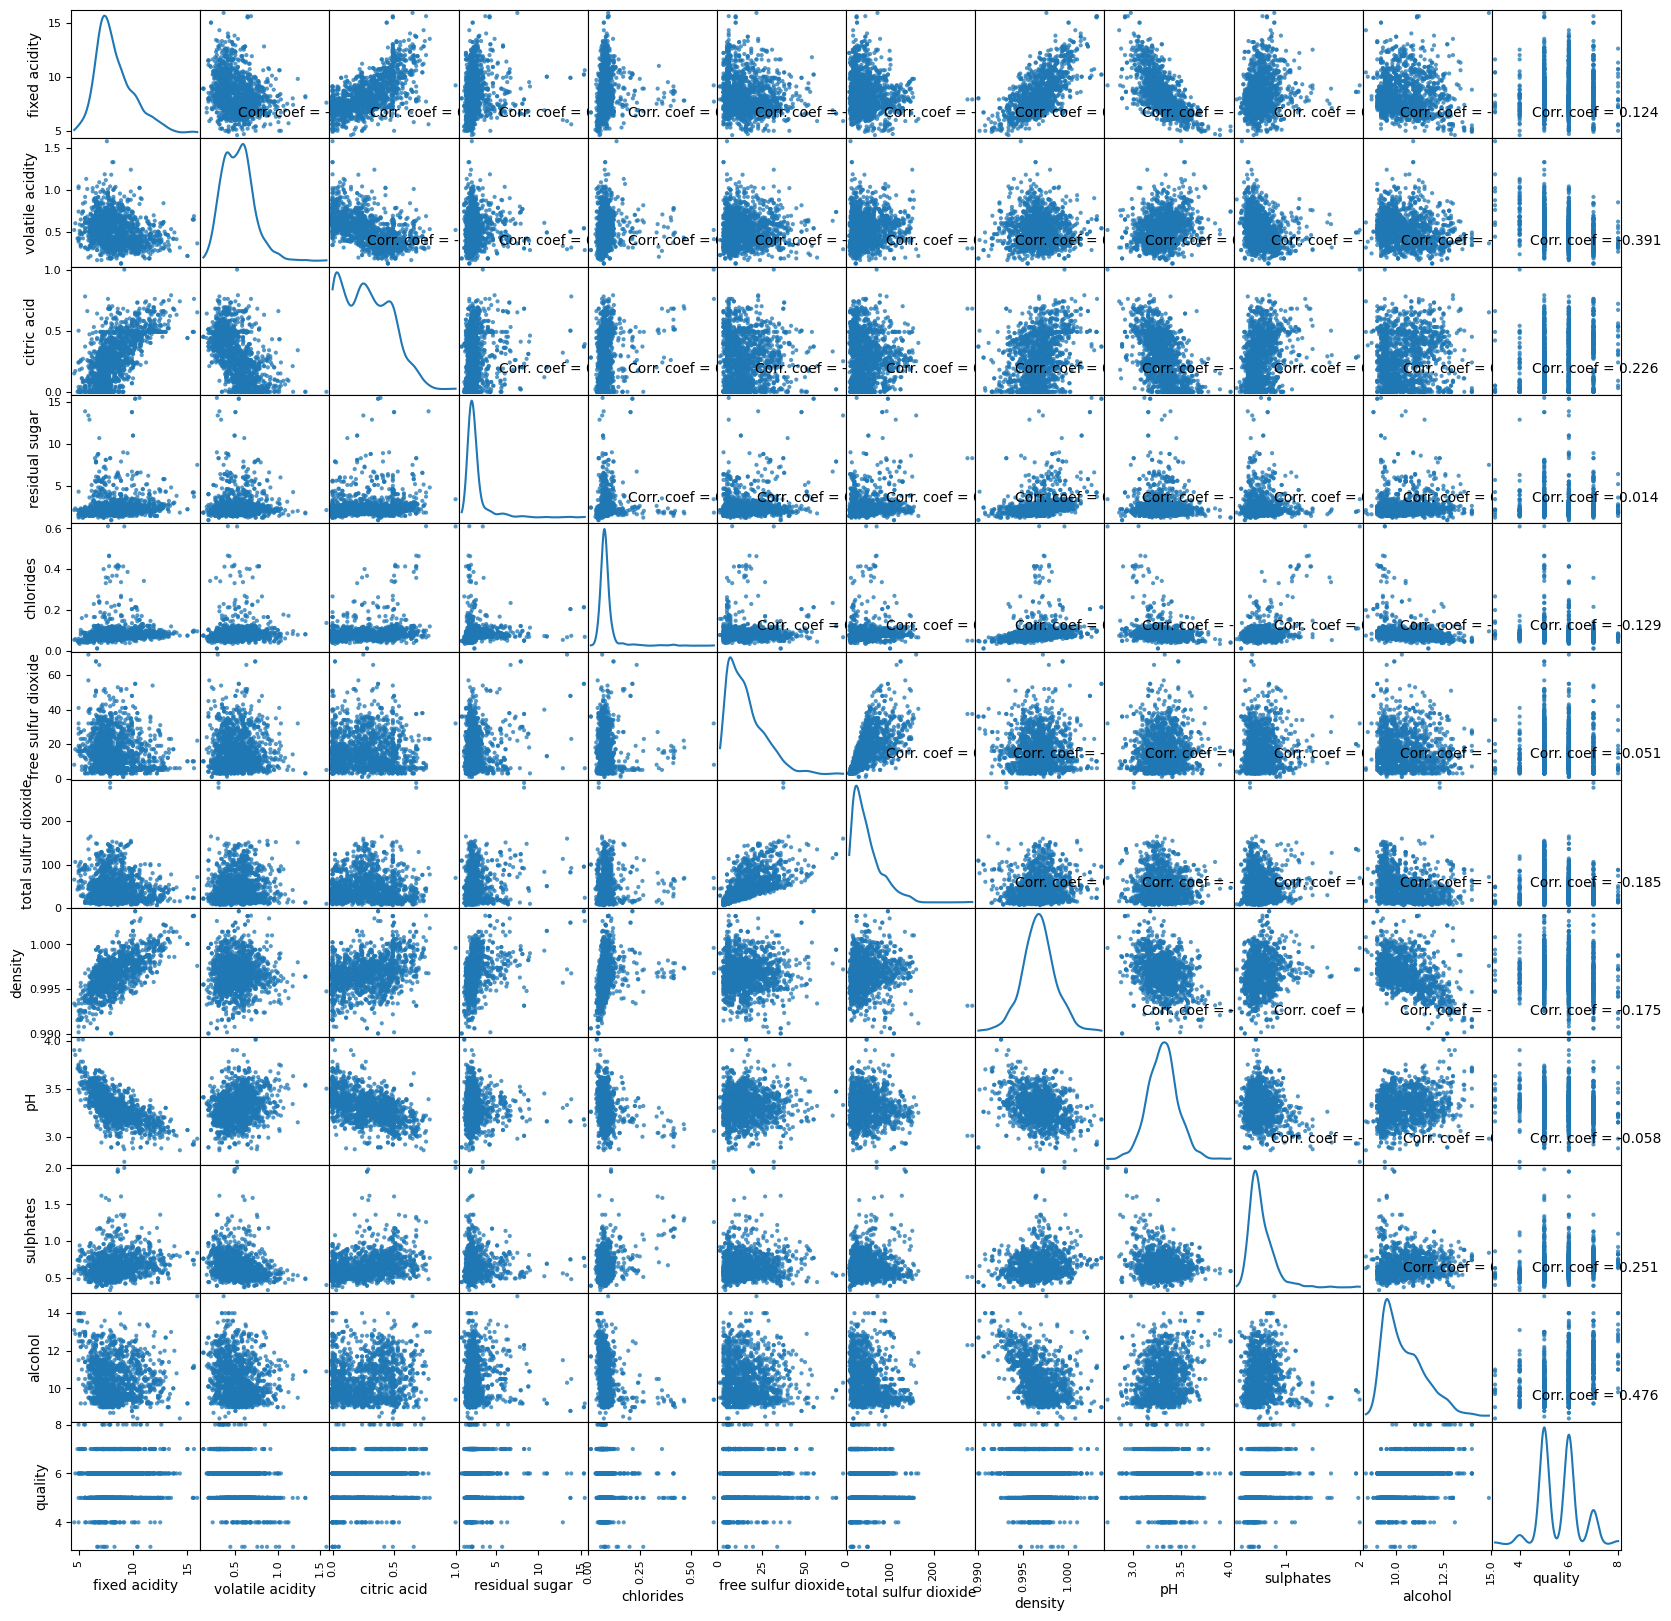

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    # if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    #     columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    drop_cols = []
    remain_cols = []
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
        if columnNames[j]=='quality' and (corrs[i, j] < -0.1 or corrs[i, j] > 0.1):
            # print(columnNames[i], " & ", columnNames[j], " ", corrs[i, j])
            remain_cols.append(columnNames[i])
    plt.savefig('figs/'+datanames[0]+'_pair_plot.png', dpi=300, bbox_inches='tight')
    # plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(dfs[0], 20, 10)

In [9]:
heat_corr=dfs[0].corr()
heat_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64